# Disease Symptoms Predictions using RandomForest Algorithm

In [1]:
# libraries import

In [2]:
import numpy as np

In [3]:
import pandas as pd

In [4]:
import matplotlib as plt

In [5]:
%matplotlib inline

In [6]:
import seaborn as sns

In [7]:
import joblib as job

In [8]:
import streamlit as st

In [9]:
# loading the dataset
df = pd.read_csv(r'C:\Users\user\Desktop\CSV_FILES\Disease.csv')

In [10]:
# inspecting the data
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [11]:
# basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 349 entries, 0 to 348
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               349 non-null    object
 1   Fever                 349 non-null    object
 2   Cough                 349 non-null    object
 3   Fatigue               349 non-null    object
 4   Difficulty Breathing  349 non-null    object
 5   Age                   349 non-null    int64 
 6   Gender                349 non-null    object
 7   Blood Pressure        349 non-null    object
 8   Cholesterol Level     349 non-null    object
 9   Outcome Variable      349 non-null    object
dtypes: int64(1), object(9)
memory usage: 27.4+ KB


In [12]:
# different diseases in the data
df.groupby(['Disease']).size()

Disease
Acne                             1
Allergic Rhinitis                6
Alzheimer's Disease              5
Anemia                           1
Anxiety Disorders                6
                                ..
Ulcerative Colitis               5
Urinary Tract Infection          5
Urinary Tract Infection (UTI)    3
Williams Syndrome                1
Zika Virus                       2
Length: 116, dtype: int64

In [13]:
# different diseases to be predicted
df['Disease'].unique()

array(['Influenza', 'Common Cold', 'Eczema', 'Asthma', 'Hyperthyroidism',
       'Allergic Rhinitis', 'Anxiety Disorders', 'Diabetes',
       'Gastroenteritis', 'Pancreatitis', 'Rheumatoid Arthritis',
       'Depression', 'Liver Cancer', 'Stroke', 'Urinary Tract Infection',
       'Dengue Fever', 'Hepatitis', 'Kidney Cancer', 'Migraine',
       'Muscular Dystrophy', 'Sinusitis', 'Ulcerative Colitis',
       'Bipolar Disorder', 'Bronchitis', 'Cerebral Palsy',
       'Colorectal Cancer', 'Hypertensive Heart Disease',
       'Multiple Sclerosis', 'Myocardial Infarction (Heart...',
       'Urinary Tract Infection (UTI)', 'Osteoporosis', 'Pneumonia',
       'Atherosclerosis', 'Chronic Obstructive Pulmonary...', 'Epilepsy',
       'Hypertension', 'Obsessive-Compulsive Disorde...', 'Psoriasis',
       'Rubella', 'Cirrhosis', 'Conjunctivitis (Pink Eye)',
       'Liver Disease', 'Malaria', 'Spina Bifida', 'Kidney Disease',
       'Osteoarthritis', 'Klinefelter Syndrome', 'Acne', 'Brain Tumor',


In [14]:
# checking for the missing values
df.isnull()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
344,False,False,False,False,False,False,False,False,False,False
345,False,False,False,False,False,False,False,False,False,False
346,False,False,False,False,False,False,False,False,False,False
347,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

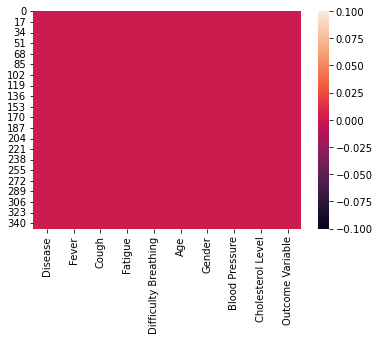

In [15]:
# plot to determine missing values
sns.heatmap(df.isnull())

In [16]:
# Data Augmentation (sythentic data)

df['Smoking'] = df['Fever'] * 1
df['Alcohol Consumption'] = df['Cough'] * 1
df['Vomiting'] = df['Fatigue'] * 1
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable,Smoking,Alcohol Consumption,Vomiting
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive,Yes,No,Yes
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,No,Yes,Yes
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative,No,Yes,Yes
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,Yes,Yes,No
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive,Yes,Yes,No


In [17]:
# Data transformation

df['Disease'] = df['Disease'].replace(['Yes', 'No'], 
    [1, 0])
df['Fever'] = df['Fever'].replace(['Yes', 'No'], 
    [1, 0])
df['Cough'] = df['Cough'].replace(['Yes', 'No'], 
    [1, 0])
df['Fatigue'] = df['Fatigue'].replace(['Yes', 'No'],
    [1, 0])
df['Difficulty Breathing'] = df['Difficulty Breathing'].replace(
    ['Yes', 'No'], [1, 0])
df['Gender'] = df['Gender'].replace(['Male', 'Female'], 
    [1, 0])
df['Blood Pressure'] = df['Blood Pressure'].replace(
    ['Low','Normal', 'High'], [1, 2, 3])
df['Cholesterol Level'] = df['Cholesterol Level'].replace(
    ['Low','Normal', 'High'], [1, 2, 3])
df['Outcome Variable'] = df['Outcome Variable'].replace(
    ['Positive','Negative'], [1, 0])
df['Smoking'] = df['Smoking'].replace(['Yes', 'No'],
    [1, 0])
df['Alcohol Consumption'] = df['Alcohol Consumption'].replace(
    ['Yes','No'], [1, 0])
df['Vomiting'] = df['Vomiting'].replace(['Yes', 'No'], 
    [1, 0])

In [18]:
# the unique values 
df['Disease'].value_counts()

Asthma                            23
Stroke                            16
Osteoporosis                      14
Hypertension                      10
Diabetes                          10
                                  ..
Autism Spectrum Disorder (ASD)     1
Hypoglycemia                       1
Fibromyalgia                       1
Eating Disorders (Anorexia,...     1
Williams Syndrome                  1
Name: Disease, Length: 116, dtype: int64

In [19]:

df[(df['Disease']=='Diabetes')]['Outcome Variable']


14     0
107    1
116    0
155    1
187    1
188    1
213    0
246    0
305    0
318    1
Name: Outcome Variable, dtype: int64

In [20]:
# features Extraction

X = df.drop(['Outcome Variable', 'Disease'], axis=1)
Y = df['Outcome Variable']

In [21]:
# Data preprocessing/normalization

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(X)

In [22]:
# model selection

from sklearn.model_selection import train_test_split

In [23]:
# choose classifiers to be trainned

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression


In [24]:
# split the data (20% for testing set and 80% for training set)

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size = 0.2, random_state = 42)

In [25]:
# train randomforest classifier
rcl = RandomForestClassifier(n_estimators=150)

In [26]:
# fit the model
rcl.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [27]:
# make predictions 
predictions = rcl.predict(X_test)

In [28]:
# importing evaluation module

from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

In [29]:
# randomforest performance

print('accuracy_score:', accuracy_score(predictions, y_test)*100)

accuracy_score: 84.28571428571429


In [30]:
cm1 = confusion_matrix(predictions, y_test)
cm1

array([[27,  8],
       [ 3, 32]], dtype=int64)

In [31]:
# training size
X_train.size


3069

In [32]:
# testing size
X_test.size

770

# Evaluating the model

In [33]:
# show all the evaluation metrics
TP=cm1[0][0]
TN=cm1[1][1]
FN=cm1[1][0]
FP=cm1[0][1]

print('Model Accuracy :',
      (TP+TN)/(TP+TN+FN+FP))
print('Testing Sensitivity/Recall :',
      (TP/(TP+FN)))
print('Testing Specificity :',
      (TN/(TN+FP)))
print('Testing Precision :',
      (TP/(TP+FP)))

Model Accuracy : 0.8428571428571429
Testing Sensitivity/Recall : 0.9
Testing Specificity : 0.8
Testing Precision : 0.7714285714285715


In [34]:
# save the model/serialization
job.dump(rcl, 'disease_prediction_model.pkl')



['disease_prediction_model.pkl']

# Building the web based app

In [35]:
# load the saved model
rcl = job.load('disease_prediction_model.pkl')


In [36]:
# Display Title
st.title('Disease Symptoms Prediction')

# Get user input
symptoms_list = st.text_input('Enter symptoms (separated by comma):')

# process user inputs 

try:
    symptoms_map = {
        'Fever': bool,
        'Cough': bool,
        'Fatigue': bool,
        'Difficulty Breathing': bool,
        'Age': int,
        'Gender': bool, 
        'Blood Pressure': str,
        'Cholesterol Level': str,
        'Smoking': bool,
        'Alcohol Consumption': bool,
        'Vomiting': bool
    }
symptoms_list = []
for symptom in symptoms.split(','):
    symptom = symptom.strip()
    if symptoms_map[symptom] == bool:
        symptoms_list.append(symptom.lower() =='yes')
    elif symptoms_map[symptom] == int:
        symptom_list.append(int(symptom))
    else:
        symptoms_list.append(symptom)
        
        
# make predictions
prediction = rcl.predict(np.array([symptoms_list]))

# Display result
st.write('Predicted Disease:', prediction[0])

# run the app
st.run(disease_prediction_model.pkl)

SyntaxError: invalid syntax (Temp/ipykernel_9036/1849016544.py, line 23)

In [ ]:
'''
Reqiurements: numpy, pandas, 
seaborn, joblib, matplotlib, 
streamlit, sklearn and more, 
as you continue buiding the app. 

NOTE: Ensure you install all these 
packages in your VScode before 
running the model.
'''